<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section. 1 Project

# 필수사항
1. 지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
2. 연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.


# 방법
-  Section.1   
 - EDA, Feature Engineering, Data Manipulation, Data Visualization, Data
Wrangling   
- Sprint 2   
  - Bayesian, Confidence Interval, Hypothesis Test, AB Test   
- Sprint 3   
  - Linear Algebra, Dimensionality Reduction, PCA, Clustering, Gradient Descent   

# 피쳐정보
Name : 게임의 이름입니다.    
Platform : 게임이 지원되는 플랫폼의 이름입니다    
Year : 게임이 출시된 연도입니다.    
Genre : 게임의 장르입니다.    
Publisher : 게임을 제작한 회사입니다.    
NA_Sales : 북미지역에서의 출고량입니다.   
EU_Sales : 유럽지역에서의 출고량입니다.    
JP_Sales : 일본지역에서의 출고량입니다.   
Other_Sales : 기타지역에서의 출고량입니다.    

# 전처리

In [1]:
# from google.colab import files
# files.upload();

In [2]:
import pandas as pd
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
rawdata = pd.read_csv('vgames2.csv')
df = pd.read_csv('vgames2.csv')
df = df.iloc[:,1:] # 불필요한 인덱스 제거

In [4]:
# df.info()

In [5]:
# df[df.Year.isnull()] # 년도 결측값 확인

In [6]:
# 판매량 데이터 높은 값만 수정
df.iat[6949,3] = 2004
df.iat[16275,3] = 1978
df.iat[13327,3] = 2001
df.iat[31,3] = 2007
df.iat[3347,3] = 2008
df.iat[3562,3] = 2006
df.iat[8529,3] = 2008
df.iat[4181,3] = 2007
df.iat[5720,3] = 1980
df.iat[2130,3] = 2006
df.iat[10965,3] = 2004

In [7]:
df.dropna(axis=0, subset=['Year'],inplace=True)
df.reset_index(inplace=True, drop= True)
df.Year = df.Year.astype(int)

In [8]:
# df[df['Genre'].isnull()]

In [9]:
# df.Genre.value_counts() # 장르종류

In [10]:
# 판매량 높은 장르 결측값 등록
df.iat[1946,4] = 'Role-Playing' 
df.iat[9348,4] = 'Adventure'
df.iat[4523,4] = 'Misc'
df.iat[16316,4] = 'Racing'
df.iat[3871,4] = 'Sports'
df.iat[15268,4] = 'Role-Playing'
df.iat[12135,4] = 'Adventure'

In [11]:
df.dropna(axis = 0 , subset=['Genre'], inplace=True)
df.reset_index(inplace=True, drop=True)

In [12]:
# df[df['Publisher'].isna()]

In [13]:
df.dropna(axis = 0 , subset=['Publisher'],inplace = True)  # Publisher 출고량 높은 사항없어서 모두 제거
df.reset_index(inplace=True, drop=True)

In [14]:
# df.duplicated().sum()

In [15]:
# df.info()

In [16]:
df.NA_Sales = df.NA_Sales.str.replace("M","").str.replace('K','000').astype(float) # 출고량의 M값과 K값 정리
K_index = df[df['NA_Sales'] >10]
K_index = K_index['NA_Sales']
K_1000 = K_index/1000000
df.loc[K_1000.index,'NA_Sales'] = K_1000
df['NA_Sales'] = round(df['NA_Sales'],2)

df.EU_Sales = df.EU_Sales.str.replace('M','').str.replace('K','000').astype(float)
K_index2 = df[df['EU_Sales']>10]
K_index2 = K_index2['EU_Sales']
K_2000 = K_index2/1000000
df.loc[K_2000.index,'EU_Sales'] = K_2000
df['EU_Sales'] = round(df['EU_Sales'],2)

df.JP_Sales = df.JP_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index3 = df[df['JP_Sales']>10]
k_index3 = k_index3['JP_Sales']
k_3000 = k_index3/1000000
df.loc[k_3000.index,'JP_Sales'] = k_3000
df['JP_Sales'] = round(df['JP_Sales'],2)

df.Other_Sales = df.Other_Sales.str.replace('M','').str.replace('K','000').astype(float)
k_index4 = df[df['Other_Sales'] >10]
k_index4 = k_index4['Other_Sales']
k_4000 = k_index4/1000000
df.loc[k_4000.index,'Other_Sales'] = k_4000
df.Other_Sales = round(df.Other_Sales,2)

In [17]:
year_200 = df[df['Year']<10]               # 년도별 이상치 정리
year_200 = year_200.astype(str)
y200 = '200'+year_200['Year']

year_20 = df[(df['Year']>=10) & (df['Year']<80) ]
year_20 = year_20.astype(str)
y20 = '20'+year_20['Year']

year19 = df[(df['Year']>=80) & (df['Year']<100) ]
year19 = year19.astype('str')
y19 = '19' + year19['Year']

In [18]:
df.loc[y200.index,'Year'] = y200           # 정리한 이상치 대입
df.loc[y20.index,'Year'] = y20
df.loc[y19.index,'Year']=y19
df.Year = df.Year.astype(int)

In [19]:
Sales_sum = (df.loc[:,'NA_Sales']+df.loc[:,'EU_Sales']+df.loc[:,'JP_Sales']+df.loc[:,'Other_Sales']) 
df['Sales_sum'] = Sales_sum  # 출고량 합계 피쳐 생성

In [20]:
# df.duplicated().sum()

# 1번 데이터


# 2번 데이터

In [21]:
# df.Platform.value_counts()  
# 장르의 종류 및 개수 확인
# 휴대용 게임: WiiU DS 3DS PSP PSV GBA SAT GB NG SCD WS
# 콘솔 게임 : Wii PS PS2 PS3 PS4 XB X360 XOne GC N64 SNES NES 2600 DC GEN 3DO TG16 GG PCFX
# PC 게임 : PC

In [ ]:
import copy                        # 플랫폼을 3개로 묶어서 분석
df2 = copy.deepcopy(df)

hand  = ["WiiU", "DS", "3DS",  "PSP", "PSV", "GBA", "SAT", "GB", "NG", "SCD", "WS"]  
for i in hand:
    df2['Platform'] = df2['Platform'].replace(i, "0")

consol = ["Wii", "PS", "PS2", "PS3", "PS4",  "XB",  "X360", "XOne", "GC", "N64", "SNES", "NES", "2600", "DC", "GEN", "3DO", "TG16", "GG", "PCFX"]
for j in consol:
    df2['Platform'] = df2['Platform'].replace(j,"1")
df2['Platform'] = df2['Platform'].replace('PC',"2")

df2[df2['Platform'].str.contains('([0-9])')==False] # 바뀌지 않은 것 있는지 확인

# 휴대용 : 0 , 콘솔 : 1 , PC : 2

In [44]:
portable = df2.query('Platform == "0"') # 그래프에 피쳐 엔지니어링
consol = df2.query('Platform == "1"')
pc = df2.query('Platform == "2"')


portable = portable.iloc[:,[2,9]]
consol = consol.iloc[:,[2,9]]
pc = pc.iloc[:,[2,9]]

portable = portable.groupby('Year').sum()
consol = consol.groupby('Year').sum()
pc = pc.groupby('Year').sum()

# 2. 연도별 게임의 트렌드가 있을까?   
- 1980년 초, 콘솔게임 등장하습였다. 이 시기에는 게임산업의 경쟁과열로 질이 낮은 게임들이 많이 출시되었습니다.
- 1983년 소비자들의 불만이 극에 달하였고 게임업계에서 가장 큰 재앙으로 불리는 아타리쇼크가 일어났습니다.
- 아타리쇼크는 당시 업계 거장이었던 아타리사가 저질 게임을 발매하면서 게임업계의 붕괴를 초래한 사건입니다.
- 이렇게 주춤했던 콘솔 게임은 1990년대 초반 닌텐도사의 '수퍼패미컴'이라는 게임기로 사람들의 다시 신임을 얻기 시작했고, 1994년 말, 누구나 한 번쯤 들어봤을 소니사의 플레이스테이션이 출시되면서 콘솔업계는 승승장구 하게됩니다.
-2000년대 중반에는 닌텐도DS와 플레이스테이션 포터블의 등장으로 포터블 산업의 전성기를 보였으나, 2010년 이후 모바일의 급격한 발전으로 게임산업 전반이 축소하는 것을 볼 수 있습니다.
- 전체적인 그래프 추세를 볼 때,각자의 흥망성쇠만 있을 뿐 카테고리 간에 상관관계는 없는 것으로 보입니다. 

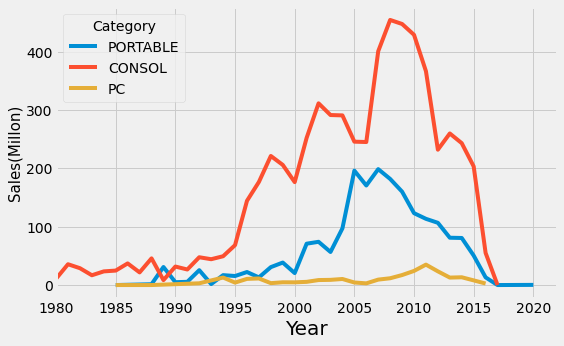

In [53]:
plt.figure(figsize=(8,5))
plt.style.use('fivethirtyeight')
plt.plot(portable)
plt.plot(consol)
plt.plot(pc)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('Sales(Millon)', fontsize =15)
plt.xlim(1980,2022,1)
plt.legend(["PORTABLE","CONSOL","PC"],title = "Category")
plt.show();